In [2]:
# Montar Google Drive:
drive.mount('/content/drive')

Mounted at /content/drive


# CNN

Este código é uma implementação completa de uma Rede Neural Convolucional (CNN) para classificar imagens em duas categorias: "Normal" e "Covid". Ele foi projetado para ser executado no ambiente do Google Colab e utiliza diversas bibliotecas Python, como TensorFlow, NumPy e Matplotlib.

In [11]:
# Bibliotecas:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import datetime
from google.colab import drive

In [12]:
# Definindo os caminhos:
BASE_PATH = '/content/drive/MyDrive/CNN_COVID/Data'
train_dir = os.path.join(BASE_PATH, 'train')
test_dir = os.path.join(BASE_PATH, 'test')

In [13]:
# Verificar a existência dos diretórios de dados:

for dir in [train_dir, test_dir]:
    if not os.path.exists(dir):
        raise FileNotFoundError(f"Diretório não encontrado: {dir}")

In [14]:
# Contando as imagens antes de passar pelo aumento de dados:
def count_images(directory):
    total = 0
    for root, dirs, files in os.walk(directory):
        total += len(files)
    return total

print(f"O diretório de treinamento contém {count_images(train_dir)} imagens.")
print(f"O diretório de teste contém {count_images(test_dir)} imagens.")

O diretório de treinamento contém 378 imagens.
O diretório de teste contém 163 imagens.


In [15]:
# Inicialização da CNN:
classifier = tf.keras.Sequential([ #criando o modelo sequencial
    tf.keras.layers.Conv2D(32, 3, padding="same", input_shape=(64, 64, 3), activation='relu'), #primeira camada convolucional
    tf.keras.layers.MaxPooling2D(), #primeira camada de pooling
    tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"), #camada convolucionalcom 64 filtros
    tf.keras.layers.MaxPooling2D(),  #camada de pooling com um tamanho de janela 2x2
    tf.keras.layers.Flatten(), #camada de achatamento
    tf.keras.layers.Dense(128, activation='relu'), #camada densa com 128 neurônios
    tf.keras.layers.Dense(1, activation='sigmoid') #camada de saída
])

In [16]:
# Compilando o modelo:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [17]:
# ImageDataGenerator:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='binary'
)

Found 378 images belonging to 2 classes.
Found 163 images belonging to 2 classes.


In [18]:
# Imprima a codificação das labels:
print("Codificação das labels para o conjunto de treinamento:")
print(training_set.class_indices)

Codificação das labels para o conjunto de treinamento:
{'Covid': 0, 'Normal': 1}


In [19]:
# Treinamento:
history = classifier.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=15,
    validation_data=test_set,
    validation_steps=len(test_set),
)

Epoch 1/15
24/24 [==============================] - 131s 5s/step - loss: 0.3709 - accuracy: 0.8730 - val_loss: 0.1675 - val_accuracy: 0.9202
Epoch 2/15
24/24 [==============================] - 16s 694ms/step - loss: 0.1655 - accuracy: 0.9577 - val_loss: 0.0970 - val_accuracy: 0.9509
Epoch 3/15
24/24 [==============================] - 18s 781ms/step - loss: 0.1040 - accuracy: 0.9683 - val_loss: 0.0692 - val_accuracy: 0.9755
Epoch 4/15
24/24 [==============================] - 16s 667ms/step - loss: 0.0952 - accuracy: 0.9735 - val_loss: 0.0441 - val_accuracy: 0.9877
Epoch 5/15
24/24 [==============================] - 16s 676ms/step - loss: 0.0752 - accuracy: 0.9735 - val_loss: 0.0664 - val_accuracy: 0.9693
Epoch 6/15
24/24 [==============================] - 16s 671ms/step - loss: 0.0648 - accuracy: 0.9894 - val_loss: 0.0536 - val_accuracy: 0.9816
Epoch 7/15
24/24 [==============================] - 16s 663ms/step - loss: 0.0645 - accuracy: 0.9894 - val_loss: 0.0381 - val_accuracy: 0.9939
E

In [20]:
# Salvando o modelo:
#classifier.save('/content/drive/MyDrive/CNN_COVID/meu_modelo_final.h5')

In [21]:
# Avaliação do modelo carregado:
#loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/CNN_COVID/meu_modelo_final.h5')
#loaded_model.evaluate(test_set)

In [22]:
# Avaliação do modelo original:
loss, accuracy = classifier.evaluate(test_set)
print("Perda:", loss)
print("Acurácia:", accuracy)

11/11 [==============================] - 5s 410ms/step - loss: 0.0298 - accuracy: 0.9877
Perda: 0.029754091054201126
Acurácia: 0.987730085849762


In [23]:
# Predições:
y_pred = []
y_test = []

NORMAL_TEST_DIR = os.path.join(test_dir, "Normal")
COVID_TEST_DIR = os.path.join(test_dir, "Covid")

for path, label in [(NORMAL_TEST_DIR, 1), (COVID_TEST_DIR, 0)]:
    for i in os.listdir(path):
        img_path = os.path.join(path, i)
        img = image.load_img(img_path, target_size=(64, 64))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        p = classifier.predict(img)
        y_test.append(p[0, 0])
        y_pred.append(label)

y_pred = np.array(y_pred)
y_test = np.array(y_test)

1/1 [==============================] - 0s 22ms/step


Text(0.5, 1.0, 'Matriz de Confusão')

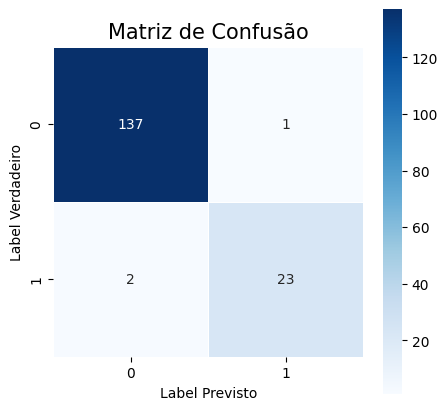

In [24]:
# Calculando a matriz de confusão:
cm = confusion_matrix(y_test.round(), y_pred)

# Calculando sensibilidade e especificidade:
true_positive = cm[0][0]
false_positive = cm[0][1]
true_negative = cm[1][1]
false_negative = cm[1][0]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Label Verdadeiro')
plt.xlabel('Label Previsto')
plt.title('Matriz de Confusão', size=15)

In [25]:
print(f'Sensibilidade (Recall): {sensitivity}')
print(f'Especificidade: {specificity}')

Sensibilidade (Recall): 0.9856115107913669
Especificidade: 0.9583333333333334


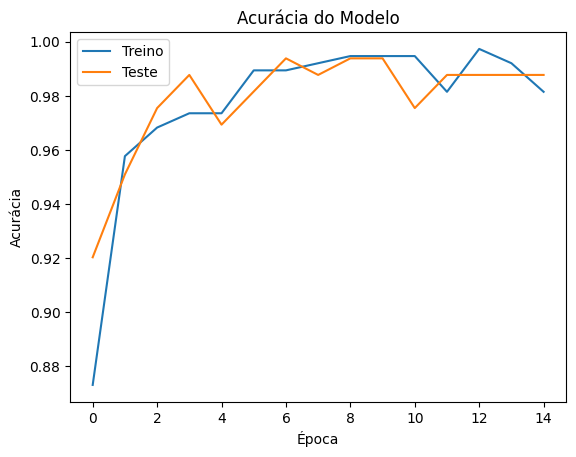

In [26]:
# Grafico de acurácia:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

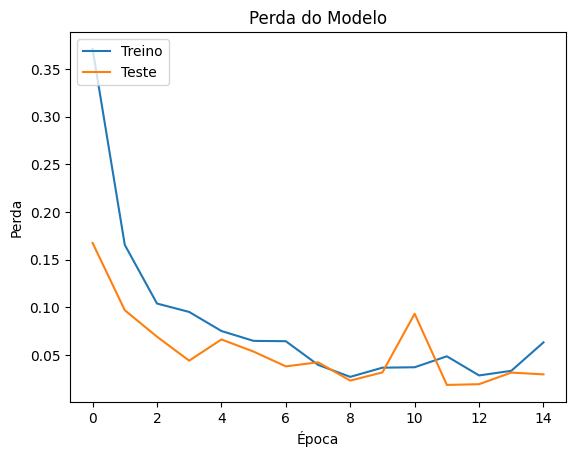

In [27]:
# Gráfico de perda:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 20ms/step
Normal


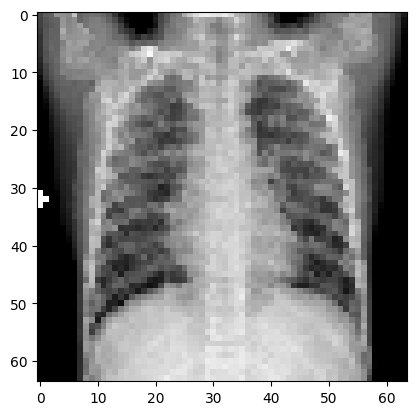

In [28]:
# Predição em uma imagem única da base Normal:
test_image = image.load_img(r'/content/drive/MyDrive/CNN_COVID/Data/test/Normal/NORMAL2-IM-1314-0001.jpeg',target_size=(64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Normal'
else:
    prediction = 'Covid'
print(prediction)

1/1 [==============================] - 0s 19ms/step
Covid


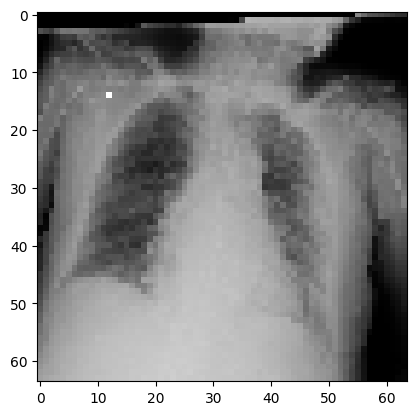

In [29]:
# Predição em uma imagem única da base COVID:
test_image = image.load_img(r'/content/drive/MyDrive/CNN_COVID/Data/test/Covid/0a6c60063b4bae4de001caaba306d1_jumbo.jpeg',target_size=(64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Normal'
else:
    prediction = 'Covid'
print(prediction)

In [30]:
# Calcular a AUC-ROC
auc_roc = roc_auc_score(y_test.round(), y_pred)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.9563768115942028


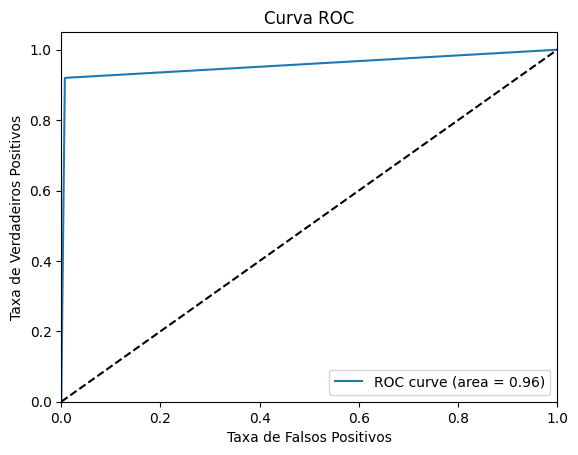

In [31]:
# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test.round(), y_pred)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

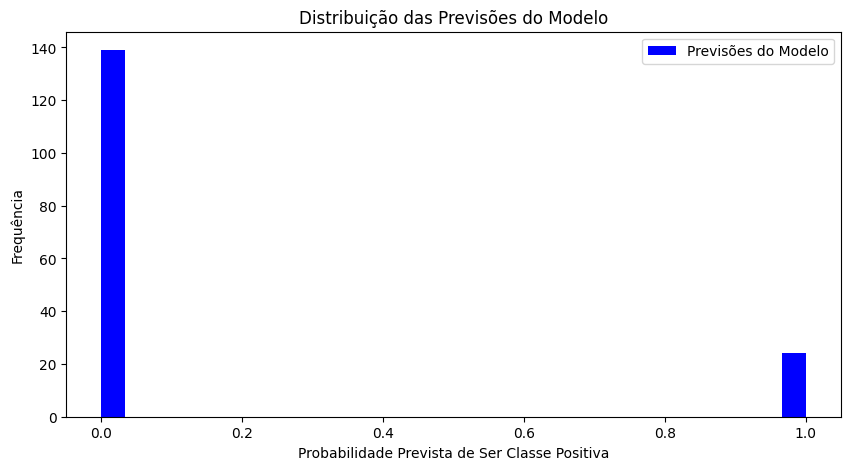

In [32]:
# Histograma das previsões pode mostrar se o modelo está incerto sobre certas classificações
plt.figure(figsize=(10, 5))
plt.hist(y_pred, bins=30, label='Previsões do Modelo', color='blue')
plt.xlabel('Probabilidade Prevista de Ser Classe Positiva')
plt.ylabel('Frequência')
plt.title('Distribuição das Previsões do Modelo')
plt.legend()
plt.show()

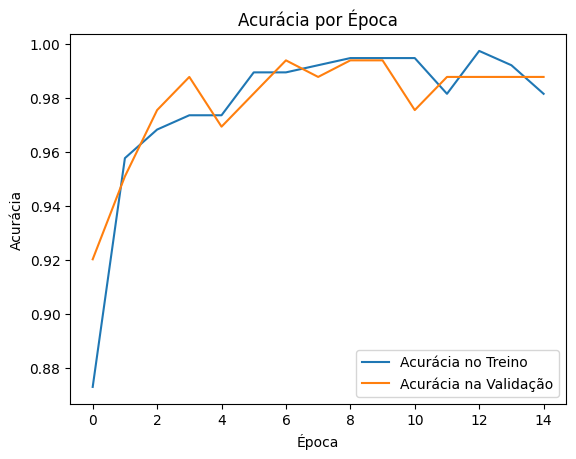

In [33]:
# Gráfico de Métricas por Época
plt.plot(history.history['accuracy'], label='Acurácia no Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia na Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Acurácia por Época')
plt.legend()
plt.show()

In [34]:
# Impressão do relatório de classificação:
print(classification_report(y_pred, y_test.round()))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       139
           1       0.92      0.96      0.94        24

    accuracy                           0.98       163
   macro avg       0.96      0.97      0.96       163
weighted avg       0.98      0.98      0.98       163

